In [40]:
import tensorflow as tf
from tensorflow  import keras
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

In [2]:
(X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
len(X_train)

60000

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<Figure size 200x200 with 0 Axes>

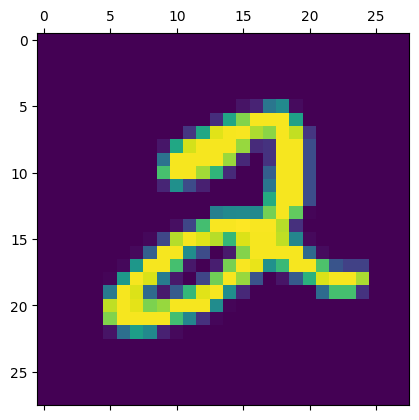

In [6]:
plt.figure(figsize=(2,2))
plt.matshow(X_train[5])

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
print(X_test_flattened.shape)
print(X_train_flattened.shape)

(10000, 784)
(60000, 784)


In [9]:
print("hey")

hey


In [27]:
print(X_test_flattened[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [28]:
model = keras.Sequential(
    [
        keras.layers.Dense(100, activation="relu", input_shape=(784,)),
        keras.layers.Dense(10, activation='sigmoid'),
    ]
)

In [29]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened , y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2744 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1251 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0882 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0672 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0530 - accuracy: 0.9835


In [30]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0717 - accuracy: 0.9774


[0.07173149287700653, 0.977400004863739]

### Testing with a sample Data ......... Letssss gooooooooooo

In [76]:
def LOAD_IMAGE(img_path):
    image_list = []
    image_size=(28,28)
    img = Image.open(img_path)
    gray_img = img.convert("L")
    img = gray_img.resize(image_size)
    img_array = np.array(img)
    image_list.append(img_array)
    return np.array(image_list)

In [77]:
def convert_pixel_range(image_data):
        normalized_image_data = (image_data * 255).astype(np.uint8)
        return normalized_image_data

In [137]:
Image_path =["./images/3.jpg","./images/2.png","./images/5.png","./images/1.png"]
image_list=[]
for path in Image_path:
    Load_image = LOAD_IMAGE(path)
    Pixeled_Image = convert_pixel_range(Load_image)
    image_list.append(Pixeled_Image)    

In [138]:
images_sample = np.array(image_list)

In [139]:
print(images_sample.shape)

(4, 1, 28, 28)


In [140]:
print(images_sample[3])

[[[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1   3
    25  28  25   4   1   1   1   1   1   1   1]
  [  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1  29 115
   146 147 146 115  56  10   2   1   1   1   1]
  [  1   1   1   1   1   1   1   1   1   1   1   1   1   2  52 135 160
   155 155 155 158 163  61   1   1   1   1   1]
  [  1   1   1   1   1   1   1   1   1   1   1   1  35 108 156 157 154
   154 154 154 158 130  19   1   1   1   1   1]
  [  1   1   1   1   1   1   1   2  24  33  52 102 149 159 154 154 154
   154 153 154 153  46   1   1   1   1   1   1]
  [  1   1   1   1   1   1   1   1  65 154 159 158 155 154 154 154 154
   154 154 159 112   2   1   1   1   1   1   1]
  [  1   1   1   1   1   1   1   2   2  72 147 160 159 157 154 154 154
   154 154 157  52   1   1   1   1   1   1   1]
  [  1   1   1   1   1   1   1   1   1   1  27  73 106 125 153 153 154
   153 156 130   8   1   1   1   1   1   1   1]
  [  1   1   1   1   1   1   1   1   1   1   1  

In [141]:
images_sample_flatten = images_sample.reshape(len(images_sample),28*28)
print(images_sample_flatten.shape)

(4, 784)


In [142]:
images_sample_flatten = images_sample_flatten/255

In [143]:
images_sample_flatten[0]=images_sample_flatten[0].flatten()
images_sample_flatten[1]=images_sample_flatten[1].flatten()
images_sample_flatten[2]=images_sample_flatten[2].flatten()

In [144]:
images_sample_flatten[3]=images_sample_flatten[3].flatten()

IndexError: index 4 is out of bounds for axis 0 with size 4

In [145]:
print(images_sample_flatten[3])

[0.00392157 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157
 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157
 0.00392157 0.00392157 0.00784314 0.00392157 0.01176471 0.09803922
 0.10980392 0.09803922 0.01568627 0.00392157 0.00392157 0.00392157
 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157
 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157
 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157
 0.00392157 0.11372549 0.45098039 0.57254902 0.57647059 0.57254902
 0.45098039 0.21960784 0.03921569 0.00784314 0.00392157 0.00392157
 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157
 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157
 0.00392157 0.00392157 0.00392157 0.00784314 0.20392157 0.52941176
 0.62745098 0.60784314 0.60784314 0.60784314 0.61960784 0.63921569
 0.23921569 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157
 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157 0.0039

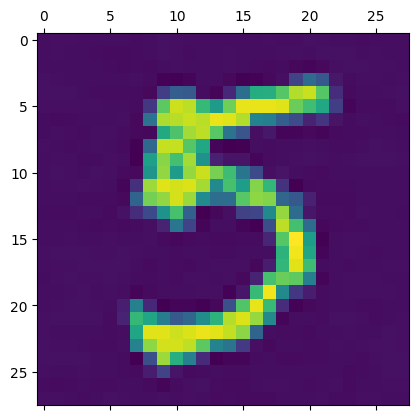

In [150]:
plt.matshow(images_sample[2][0])

In [151]:
predictions = model.predict(images_sample_flatten)
predicted_class_index = np.argmax(predictions[2])
print("The Predicted value is :", predicted_class_index)

1/1 [==============================] - 0s 43ms/step
The Predicted value is : 5
